# TRAVEL  DESTINATION RECOMMENDATION SYSTEM

#### Authors
 1 Dennis Mwanzia
 
 2 Pamela Awino
 
 3 Joshua Rwanda
 
 4 Nelson Kemboi
 
 5 Pauline Wambui
 
 6 Kane Muendo
 
 7 Ian Macharia

## 1.0 BUSINESS UNDERSTANDING

## 1.1 OVERVIEW

 AfricuraAI is a business dedicated to revolutionizing the way tourists explore Africa by lever-aging the power of machine learning and recommendation systems. With the understanding that tourists often face challenges in finding suitable travel destinations that meet their prefer-ences, budget, and time constraints, AfricuraAI aims to provide personalized recommendations for the best tourist destinations in Africa.
Our core objective is to develop a robust machine learning model that analyzes various factors, including customer reviews, budget limitations, specific locations, available amenities, and res-idence types, to suggest the ideal tourist destination that aligns with each user's unique prefer-ences. By considering these factors and analyzing text reviews, our model seeks to accurately predict the preferred tourist destinations for both new and existing users.
The AfricuraAI project brings immense value by addressing a real-world problem faced by tourists, namely the lack of personalized recommendations when planning their trips in Africa. By employing machine learning algorithms and examining a wide range of factors, our model aims to enhance the travel experience by suggesting destinations that not only meet the users' preferences but also fulfill their specific requirements.
Through the AfricuraAI platform, tourists will have access to a comprehensive and tailored travel planning experience. They can input their budget limitations, desired location prefer-ences, preferred amenities, physical attractions of interest, and desired residence type. Our ma-chine learning model will then analyze these inputs along with customer reviews and available data to provide the most suitable and personalized recommendations for the best tourist desti-nations in Africa.
With AfricuraAI, tourists will no longer struggle to find suitable travel destinations within their budget and time constraints. They can confidently plan and embark on a satisfying trip, know-ing that their preferences and requirements have been taken into account. By harnessing the power of data analysis and machine learning, AfricuraAI is poised to revolutionize the way tourists explore Africa and create unforgettable travel experiences.



## 1.2 Problem Statement

Tourists visiting Africa often struggle to find suitable travel destinations that align with their preferences, making it challenging to plan a satisfying trip within their budget and time constraints. 

Our main aim as AfricuraAI is to develop a machine learning model i.e. recommendation system that provides personalized recommendations for the best tourist destinations in Africa. By considering customer reviews, budget constraints, specific locations, available amenities, and residence type, the model aims to suggest the ideal tourist destination that aligns with the user's preferences.

By analyzing the text reviews along with the additional factors available in the dataset, the project seeks to build a model that accurately predicts the preferred tourist destination for both new and existing users. The model will take into account factors such as customer reviews, budget limitations, location preferences, amenities, physical attractions, and residence type to recommend the most suitable tourist destination in Africa.

The value of this project lies in its ability to address the real-world problem of providing personalized recommendations for tourists in their search for the best tourist destinations in Africa. By utilizing machine learning algorithms and analyzing a range of factors, the project aims to enhance the travel experience for users by suggesting destinations that meet their preferences and requirements.

# 1.3 The Data

We sourced data by scraping destination review data from TripAdvisor. 

##  1.4 Objectives

1. The goal is to build a machine learning model that can accurately predict hotel ratings based on customer reviews, budget constraints, specific locations, and the type of residence. By analyzing the text reviews and incorporating additional factors, such as sentiment analysis, budget range, geographical distance, and residence type, the objective is to develop a robust model that can make accurate predictions for new, unseen hotels. The model will help users make informed decisions when selecting hotels by considering their preferences and constraints.

#### Specifics

> To create a Recommendation system that can be used to suggest travel destinations based on budget.

> To identify top destinations in Africa

> To foster customer loyalty and repeat customers, building long term relationships between customers and travel destinations. 

> To increase customer engagement  and satisfaction by providing comprehensive and accurate information about tourist destinations.

> To generate revenue by engaging travel destinations to have them listed on the site.

> To collect user information and feedback to improve the recommendations in the long run.

## 1.5 Project Goals

1. Build a machine learning model that can accurately predict hotel ratings based on cus-tomer reviews, budget constraints, specific locations, and the type of residence.

2. Establish evaluation metrics to assess the performance of the recommendation system.

3. Deploy and Implement a real-time recommendation feature that can adapt to users' changing preferences and provide up-to-date tourist destination suggestions.


# 1.6 Success Metric

Root Mean Squared Error of close to 0 to evaluate model efficiency.

# 1.7 Methods Used

•	Descriptive Statistics

•	Data Visualization

•	Machine Learning


## 2. 0 DATA UNDERSTANDING

# loading libraries

In [10]:
# Importing necessary libraries
import pandas as pd
import json
import glob
import re
import math

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from sklearn.metrics import r2_score
from surprise import Dataset, Reader, KNNBasic, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

import warnings

# Ignore future deprecation warnings
warnings.filterwarnings("ignore", category=FutureWarning)

sns.set_style('darkgrid')

from Cleaner import DataCleaning

## 2. 1 Loading datasets

We will begin by Instantiating our class object for cleaning, DataCleaning. 

In [11]:
cleaner = DataCleaning()

### 1. dataset one 

In [12]:
json_files = json_files = ['Data/botswana.json', 'Data/capeverde.json', 'Data/drc.json', 'Data/egypt.json',
                           'Data/ethiopia.json', 'Data/ghana.json', 'Data/kenya.json','Data/madagascar.json',
                           'Data/malawi.json', 'Data/morocco.json', 'Data/namibia.json', 'Data/nigeria.json',
                           'Data/rwanda.json','Data/senegal.json', 'Data/seychelles.json', 'Data/south_africa.json',
                           'Data/tanzania.json', 'Data/uganda.json', 'Data/zambia.json']

In [13]:
cleaner.read_json_files(json_files)
df = cleaner.df

UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 111344: character maps to <undefined>

### 2. Reviews dataset

In [526]:
#read review data
reviews = pd.read_csv(r"Data/reviews_data.csv", index_col=0)
reviews

,id,url,title,lang,locationId,publishedDate,publishedPlatform,rating,helpfulVotes,travelDate,text,user,ownerResponse,subratings,machineTranslated,machineTranslatable,photos,placeInfo
0,863480416,https://www.tripadvisor.com/ShowUserReviews-g2...,Must See,en,2189822,2022-10-06T20:13:49-04:00,Desktop,5,0,2022-09,Gee is a passionate tour guide. The animals a...,"{'userId': 'A87669AAD9DA05FFBD46F1334B329FFD',...",NaN,[],False,False,[],"{'id': '2189822', 'name': 'CARACAL Biodiversit..."
1,856328161,https://www.tripadvisor.com/ShowUserReviews-g2...,Great tour,en,2189822,2022-08-25T06:53:49-04:00,Desktop,5,0,2022-08,Lots to see. Easy to get to from the Safari Lo...,"{'userId': '9FFED7DDC68883BBB8F4024333970E9A',...",NaN,[],False,False,[],"{'id': '2189822', 'name': 'CARACAL Biodiversit..."
2,847451595,https://www.tripadvisor.com/ShowUserReviews-g2...,zoo for conserved animals and birds,en,2189822,2022-07-11T23:28:07-04:00,Desktop,4,0,2022-07,a kind of a zoo for injured and saved animals ...,"{'userId': 'B5E56A483B579518DDD82A3DA0E94487',...",NaN,[],False,False,"[{'id': '613423342', 'locations': [{'name': 'C...","{'id': '2189822', 'name': 'CARACAL Biodiversit..."
3,731343195,https://www.tripadvisor.com/ShowUserReviews-g2...,Great place to see some of the smaller wildlif...,en,2189822,2019-12-08T03:54:09-05:00,Desktop,5,0,2019-11,They do great rehabilitating injured animals. ...,"{'userId': '882D0A6C7152105BB0D83C84F3CB160D',...",NaN,[],False,False,"[{'id': '440235996', 'locations': [{'name': 'C...","{'id': '2189822', 'name': 'CARACAL Biodiversit..."
4,720927932,https://www.tripadvisor.com/ShowUserReviews-g2...,Worth it just to play with Badgy,en,2189822,2019-10-24T03:50:09-04:00,Mobile,5,1,2019-10,"We took the guided tour from Isaac, who was gr...","{'userId': '203EBC7F3F51AAAA39A87D2E58842C76',...",NaN,[],False,False,"[{'id': '432829268', 'locations': [{'name': 'C...","{'id': '2189822', 'name': 'CARACAL Biodiversit..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78681,157601077,https://www.tripadvisor.com/ShowUserReviews-g7...,Ideal for quiet relaxation.,en,2720312,2013-04-13T07:01:47-04:00,Desktop,5,1,2013-04,Nothing I disliked.\nStopped her for an excell...,"{'userId': 'DE7F7643421284F6E26B31283D2CCB85',...",NaN,[],False,False,[],"{'id': '2720312', 'name': 'Igongo Cultural Cen..."
78682,135682898,https://www.tripadvisor.com/ShowUserReviews-g7...,Eriijukiro - the wonderful Cultural Centre at ...,en,2720312,2012-07-29T05:01:29-04:00,Desktop,5,3,2012-07,"For travellers to the south west of Uganda, th...","{'userId': 'D9205755480636B049F9DAFB8BE6FF12',...",NaN,[],False,False,"[{'id': '45180838', 'locations': [{'name': 'Ig...","{'id': '2720312', 'name': 'Igongo Cultural Cen..."
78683,129461615,https://www.tripadvisor.com/ShowUserReviews-g7...,A very pleasant stop outside Mbarara!,en,2720312,2012-05-06T08:45:16-04:00,Desktop,4,3,2012-04,Located just a few miles outside Mbarara and h...,"{'userId': 'FB3E9894020549D01D0468808AE93A5C',...",NaN,[],False,False,"[{'id': '41254017', 'locations': [{'name': 'Ig...","{'id': '2720312', 'name': 'Igongo Cultural Cen..."
78684,331367989,https://www.tripadvisor.com/ShowUserReviews-g7...,Igongo,tr,2720312,2015-12-08T00:45:50-05:00,Desktop,4,2,2015-11,Çok kaliteli ve temiz bir tesis . Yemekleri ço...,"{'userId': '8C31D999A4FC2AB2DC9824E3FFF82BE6',...",NaN,[],False,False,"[{'id': '162787052', 'locations': [{'name': 'I...","{'id': '2720312', 'name': 'Igongo Cultural Cen..."


In [527]:
# Rename the column at a specific index
reviews.rename(columns={reviews.columns[0]: 'userId'}, inplace=True)

We will select most important columns for reviews dataset 


In [528]:
# select relvant columns
reviews = reviews[['userId', 'locationId', 'title', 'rating', 'text', 'placeInfo' ]]
reviews

,userId,locationId,title,rating,text,placeInfo
0,863480416,2189822,Must See,5,Gee is a passionate tour guide. The animals a...,"{'id': '2189822', 'name': 'CARACAL Biodiversit..."
1,856328161,2189822,Great tour,5,Lots to see. Easy to get to from the Safari Lo...,"{'id': '2189822', 'name': 'CARACAL Biodiversit..."
2,847451595,2189822,zoo for conserved animals and birds,4,a kind of a zoo for injured and saved animals ...,"{'id': '2189822', 'name': 'CARACAL Biodiversit..."
3,731343195,2189822,Great place to see some of the smaller wildlif...,5,They do great rehabilitating injured animals. ...,"{'id': '2189822', 'name': 'CARACAL Biodiversit..."
4,720927932,2189822,Worth it just to play with Badgy,5,"We took the guided tour from Isaac, who was gr...","{'id': '2189822', 'name': 'CARACAL Biodiversit..."
...,...,...,...,...,...,...
78681,157601077,2720312,Ideal for quiet relaxation.,5,Nothing I disliked.\nStopped her for an excell...,"{'id': '2720312', 'name': 'Igongo Cultural Cen..."
78682,135682898,2720312,Eriijukiro - the wonderful Cultural Centre at ...,5,"For travellers to the south west of Uganda, th...","{'id': '2720312', 'name': 'Igongo Cultural Cen..."
78683,129461615,2720312,A very pleasant stop outside Mbarara!,4,Located just a few miles outside Mbarara and h...,"{'id': '2720312', 'name': 'Igongo Cultural Cen..."
78684,331367989,2720312,Igongo,4,Çok kaliteli ve temiz bir tesis . Yemekleri ço...,"{'id': '2720312', 'name': 'Igongo Cultural Cen..."


In [529]:
# Split the dictionary-like item into separate columns
item_info = reviews['placeInfo'].apply(lambda x: pd.Series(eval(x)))
item_info.drop(columns='id', inplace=True)

# Concatenate the new columns with the original DataFrame 
reviews = pd.concat([reviews, item_info], axis=1)
reviews.head()

,userId,locationId,title,rating,text,placeInfo,name,locationString,latitude,longitude,webUrl,website,address,addressObj
0,863480416,2189822,Must See,5,Gee is a passionate tour guide. The animals a...,"{'id': '2189822', 'name': 'CARACAL Biodiversit...",CARACAL Biodiversity Center,"Kasane, Chobe National Park, North-West District",-17.809736,25.153313,https://www.tripadvisor.com/Attraction_Review-...,http://www.caracal.info/wildlife-rescue-and-re...,"Plot 3102 Airport Road, Kasane, Chobe National...","{'street1': 'Plot 3102 Airport Road', 'street2..."
1,856328161,2189822,Great tour,5,Lots to see. Easy to get to from the Safari Lo...,"{'id': '2189822', 'name': 'CARACAL Biodiversit...",CARACAL Biodiversity Center,"Kasane, Chobe National Park, North-West District",-17.809736,25.153313,https://www.tripadvisor.com/Attraction_Review-...,http://www.caracal.info/wildlife-rescue-and-re...,"Plot 3102 Airport Road, Kasane, Chobe National...","{'street1': 'Plot 3102 Airport Road', 'street2..."
2,847451595,2189822,zoo for conserved animals and birds,4,a kind of a zoo for injured and saved animals ...,"{'id': '2189822', 'name': 'CARACAL Biodiversit...",CARACAL Biodiversity Center,"Kasane, Chobe National Park, North-West District",-17.809736,25.153313,https://www.tripadvisor.com/Attraction_Review-...,http://www.caracal.info/wildlife-rescue-and-re...,"Plot 3102 Airport Road, Kasane, Chobe National...","{'street1': 'Plot 3102 Airport Road', 'street2..."
3,731343195,2189822,Great place to see some of the smaller wildlif...,5,They do great rehabilitating injured animals. ...,"{'id': '2189822', 'name': 'CARACAL Biodiversit...",CARACAL Biodiversity Center,"Kasane, Chobe National Park, North-West District",-17.809736,25.153313,https://www.tripadvisor.com/Attraction_Review-...,http://www.caracal.info/wildlife-rescue-and-re...,"Plot 3102 Airport Road, Kasane, Chobe National...","{'street1': 'Plot 3102 Airport Road', 'street2..."
4,720927932,2189822,Worth it just to play with Badgy,5,"We took the guided tour from Isaac, who was gr...","{'id': '2189822', 'name': 'CARACAL Biodiversit...",CARACAL Biodiversity Center,"Kasane, Chobe National Park, North-West District",-17.809736,25.153313,https://www.tripadvisor.com/Attraction_Review-...,http://www.caracal.info/wildlife-rescue-and-re...,"Plot 3102 Airport Road, Kasane, Chobe National...","{'street1': 'Plot 3102 Airport Road', 'street2..."


In [530]:

# Split the dictionary-like item into separate columns
address_info = reviews['addressObj'].apply(pd.Series)

# Concatenate the new columns with the original DataFrame
reviews = pd.concat([reviews, address_info], axis=1)
reviews.head()

## 3.0 DATA PREPARATION

### 3.1  Data Cleaning

Steps to start cleaning the data:

* Data Understanding: Take some time to understand the data and its structure. Identify the columns or attributes that are relevant for your analysis or purposes.

* Remove Irrelevant Data: If there are any columns or attributes that are not useful for your analysis, you can remove them from the dataset.

* Handle Missing Values: Check for missing values in the dataset and decide how to handle them. You can either remove rows with missing values, replace them with appropriate values (e.g., mean, median, mode), or use advanced techniques like imputation based on the available data.

* Standardize Formats: Check for inconsistencies in the data formats. For example, ensure that dates, addresses, or numerical values are consistently formatted across the dataset.

* Remove Duplicates: Identify and remove any duplicate entries in the dataset to avoid redundancy and maintain data integrity.

* Handle Outliers: Examine the numerical values in the dataset for any outliers. Depending on the nature of the data, you can either remove outliers if they are erroneous or handle them appropriately (e.g., by capping or transforming the values).

* Text Cleaning: If you have text data, apply text cleaning techniques to remove unwanted characters, symbols, or special characters. This can include removing punctuation, converting text to lowercase, removing stopwords, and handling any language-specific nuances.

* Normalize and Categorize Data: If there are attributes that can be normalized or categorized, apply appropriate techniques to make the data consistent and easier to analyze. This could involve scaling numerical values, creating bins for continuous variables, or encoding categorical variables.

* Validate Data Integrity: Perform a final check to ensure the integrity of the cleaned data. Validate that all required fields are populated correctly, and the data is in the expected format.

In [83]:
# preview the data
df.head()

,id,type,category,subcategories,name,locationString,description,image,photoCount,awards,...,menuWebUrl,establishmentTypes,ownersTopReasons,guideFeaturedInCopy,rentalDescriptions,photos,bedroomInfo,bathroomInfo,bathCount,baseDailyRate
0,1171922,ATTRACTION,attraction,[Sights & Landmarks],Khwai River Bridge,"Okavango Delta, North-West District",None,https://media-cdn.tripadvisor.com/media/photo-...,24,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2513264,ATTRACTION,attraction,[Nature & Parks],Gaborone Game Reserve,"Gaborone, South-East District",None,https://media-cdn.tripadvisor.com/media/photo-...,84,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3247057,ATTRACTION,attraction,[Sights & Landmarks],ISKCON Gaborone,"Gaborone, South-East District",None,https://media-cdn.tripadvisor.com/media/photo-...,21,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,478934,ATTRACTION,attraction,[Nature & Parks],Serondela Reserve,"Chobe National Park, North-West District",This region of Chobe National Park is known as...,https://media-cdn.tripadvisor.com/media/photo-...,65,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7931216,ATTRACTION,attraction,[Nature & Parks],Khutse Game Reserve,"Gaborone, South-East District",None,https://media-cdn.tripadvisor.com/media/photo-...,26,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Removing Irrelevant columns
There are several columns and attributes that are not useful for our analysis. These include **`image`**, **`photoCount`**, **`awards`**, **`phone`**, **`address`** , **`email`** **`webUrl`**, **`website`** **`neighborhoodLocations`**, **`nearestMetroStations`**, **`bookin`**, **`offerGroup`**, **`subtype`**, **`hotelClass`**, **`roomTips`**, **`checkInDate`**, **`checkOutDate`**, **`offers`**, **`hotelClassAttribution`**, **`localLangCode`**, **`isClosed`**, **`isLongClosed`**, **`openNowText`**, **`dietaryRestrictions`**, **`hours`**, **`menuWebUrl`**, **`establishmentTypes`**, **`ownersTopReasons`**, **`guideFeaturedInCopy`**, **`rentalDescriptions`** and **`photos`**.

In [84]:
columns_to_drop = ['image', 'photoCount', 'awards', 'phone', 'address', 'email', 'localAddress', 'locationString',
                   'webUrl', 'website', 'neighborhoodLocations', 'nearestMetroStations', 'ancestorLocations',
                   'booking', 'offerGroup', 'subtype', 'hotelClass', 'roomTips', 'checkInDate', 'category',
                   'checkOutDate', 'offers', 'hotelClassAttribution', 'localLangCode', 'isClosed', 'ratingHistogram',
                   'isLongClosed', 'openNowText', 'dietaryRestrictions', 'hours', 'menuWebUrl', 'localName', 
                   'establishmentTypes', 'ownersTopReasons', 'guideFeaturedInCopy', 'rentalDescriptions','photos']

cleaner.drop_columns(columns_to_drop)

cleaner.get_preview(df)

,id,type,subcategories,name,description,rankingPosition,rating,rawRanking,addressObj,latitude,...,priceLevel,priceRange,cuisines,mealTypes,dishes,features,bedroomInfo,bathroomInfo,bathCount,baseDailyRate
0,1171922,ATTRACTION,[Sights & Landmarks],Khwai River Bridge,None,3.0,4.5,3.155229,"{'street1': '', 'street2': '', 'city': None, '...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2513264,ATTRACTION,[Nature & Parks],Gaborone Game Reserve,None,7.0,3.5,2.956184,"{'street1': '', 'street2': '', 'city': 'Gaboro...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3247057,ATTRACTION,[Sights & Landmarks],ISKCON Gaborone,None,5.0,4.5,2.974105,"{'street1': 'Masokwe 18678', 'street2': 'West ...",-24.65297,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,478934,ATTRACTION,[Nature & Parks],Serondela Reserve,This region of Chobe National Park is known as...,3.0,4.5,3.029962,"{'street1': '', 'street2': '', 'city': None, '...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7931216,ATTRACTION,[Nature & Parks],Khutse Game Reserve,None,8.0,4.0,2.944026,"{'street1': None, 'street2': None, 'city': 'Ga...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3. 2 Handling Missing values

In [85]:
# Calculates the percentage of missing values in each column
cleaner.missing_values_percentage(df)

features              98.839156
dishes                98.839156
mealTypes             98.839156
cuisines              98.839156
baseDailyRate         96.461659
bathCount             96.263534
bathroomInfo          96.263534
bedroomInfo           96.263534
priceRange            60.545262
priceLevel            60.288537
numberOfRooms         52.349593
description           43.830227
amenities             27.011943
rankingDenominator    25.856680
rankingString         25.856680
rawRanking            25.856680
rankingPosition       25.856680
rating                25.477174
longitude             16.000670
latitude              16.000670
reviewTags             3.736466
addressObj             3.736466
subcategories          3.736466
dtype: float64

In [86]:
# Drops columns with missing values percentage above the specified threshold of 90
cleaner.drop_above_threshold(90)
cleaner.get_preview(df)

,id,type,subcategories,name,description,rankingPosition,rating,rawRanking,addressObj,latitude,longitude,rankingString,rankingDenominator,numberOfReviews,reviewTags,reviews,amenities,numberOfRooms,priceLevel,priceRange
0,1171922,ATTRACTION,[Sights & Landmarks],Khwai River Bridge,None,3.0,4.5,3.155229,"{'street1': '', 'street2': '', 'city': None, '...",NaN,NaN,#3 of 5 things to do in Okavango Delta,5,45,[],[],NaN,NaN,NaN,NaN
1,2513264,ATTRACTION,[Nature & Parks],Gaborone Game Reserve,None,7.0,3.5,2.956184,"{'street1': '', 'street2': '', 'city': 'Gaboro...",NaN,NaN,#7 of 25 things to do in Gaborone,25,115,"[{'text': 'eland', 'reviews': 7}, {'text': 'an...",[],NaN,NaN,NaN,NaN
2,3247057,ATTRACTION,[Sights & Landmarks],ISKCON Gaborone,None,5.0,4.5,2.974105,"{'street1': 'Masokwe 18678', 'street2': 'West ...",-24.65297,25.89846,#5 of 25 things to do in Gaborone,25,23,[],[],NaN,NaN,NaN,NaN
3,478934,ATTRACTION,[Nature & Parks],Serondela Reserve,This region of Chobe National Park is known as...,3.0,4.5,3.029962,"{'street1': '', 'street2': '', 'city': None, '...",NaN,NaN,#3 of 8 things to do in Chobe National Park,8,34,"[{'text': 'the river', 'reviews': 6}, {'text':...",[],NaN,NaN,NaN,NaN
4,7931216,ATTRACTION,[Nature & Parks],Khutse Game Reserve,None,8.0,4.0,2.944026,"{'street1': None, 'street2': None, 'city': 'Ga...",NaN,NaN,#8 of 25 things to do in Gaborone,25,29,"[{'text': 'bucket shower', 'reviews': 5}, {'te...",[],NaN,NaN,NaN,NaN


#### **`price` columns**

Price is an important factor in calculating the similarity of places in this context. We should **impute** missing values in this columns instead of dropping them

In [87]:
#previewing price level and price range
df.head()[['priceLevel', 'priceRange', 'type']]

,priceLevel,priceRange,type
0,NaN,NaN,ATTRACTION
1,NaN,NaN,ATTRACTION
2,NaN,NaN,ATTRACTION
3,NaN,NaN,ATTRACTION
4,NaN,NaN,ATTRACTION


The price level column has only dollar signs and null values, therefore we will drop it. The price range column has a range in Kenya Shillings of the amount tourists can spend in the travel destination. We create two new columns with an upper and lower limit and then fill the missing valuea with the minimum amount if the type is attraction and the mean value if the type is hotel.

In [88]:
cleaner.split_price_range()

Some columns such as features, dishes, mealTypes, cuisines, baseDailyRate, bathCount, bathroomInfo, bedroomInfo have missing values above 90 percent. We opt to drop them.

The two new columns 'LowerPrice' and 'UpperPrice' have missing values. 

In [89]:
cleaner.fill_missing_prices()

#### **`amenities` column**

In [97]:
def check_missing_values(df, column_name):
     #function to check missing values 
     missing_values = df[column_name].isna().sum()
     return print("Number of missing values in '{}' column: {}".format(column_name, missing_values))


In [98]:
#calling the function 
check_missing_values(df, 'amenities')

Number of missing values in 'amenities' column: 9680


>>>> There are some missing values in amenities. Lets inspect the `type` feature. It may help us fill these inconsistencies.

In [99]:
#defining a function to check value counts
def get_column_value_counts(df, column_name):
    column_counts = df[column_name].value_counts()
    return column_counts
# calling the function
get_column_value_counts(df, 'type')



HOTEL              24817
ATTRACTION          9264
VACATION_RENTAL     1339
RESTAURANT           416
Name: type, dtype: int64

Now we fill missing values in `amenities` with amenities you would typically find in that type of attraction

In [100]:
cleaner.replace_nan_amenities()
cleaner.get_preview(df)

,id,type,subcategories,name,description,rankingPosition,rating,rawRanking,addressObj,latitude,...,rankingDenominator,numberOfReviews,reviewTags,reviews,amenities,numberOfRooms,priceLevel,priceRange,LowerPrice,UpperPrice
0,1171922,ATTRACTION,[Sights & Landmarks],Khwai River Bridge,None,3.0,4.5,3.155229,"{'street1': '', 'street2': '', 'city': None, '...",NaN,...,5,45,[],[],bathroom only,NaN,NaN,NaN,141.0,281.0
1,2513264,ATTRACTION,[Nature & Parks],Gaborone Game Reserve,None,7.0,3.5,2.956184,"{'street1': '', 'street2': '', 'city': 'Gaboro...",NaN,...,25,115,"[{'text': 'eland', 'reviews': 7}, {'text': 'an...",[],bathroom only,NaN,NaN,NaN,141.0,281.0
2,3247057,ATTRACTION,[Sights & Landmarks],ISKCON Gaborone,None,5.0,4.5,2.974105,"{'street1': 'Masokwe 18678', 'street2': 'West ...",-24.65297,...,25,23,[],[],bathroom only,NaN,NaN,NaN,141.0,281.0
3,478934,ATTRACTION,[Nature & Parks],Serondela Reserve,This region of Chobe National Park is known as...,3.0,4.5,3.029962,"{'street1': '', 'street2': '', 'city': None, '...",NaN,...,8,34,"[{'text': 'the river', 'reviews': 6}, {'text':...",[],bathroom only,NaN,NaN,NaN,141.0,281.0
4,7931216,ATTRACTION,[Nature & Parks],Khutse Game Reserve,None,8.0,4.0,2.944026,"{'street1': None, 'street2': None, 'city': 'Ga...",NaN,...,25,29,"[{'text': 'bucket shower', 'reviews': 5}, {'te...",[],bathroom only,NaN,NaN,NaN,141.0,281.0


In [101]:
# confirm no missing vals
check_missing_values(df, 'amenities')

Number of missing values in 'amenities' column: 0


In [102]:
# fill missing values in the amenities column
cleaner.populate_empty_lists(['restaurant', 'bathroom', 'room'])

In [103]:
# Creating a new DataFrame called 'review_df' with specific columns related to reviews from the original DataFrame 'df'.
review_df = pd.DataFrame(df, columns=['numberOfReviews',
                                                'reviewTags', 'reviews'])
review_df['reviewTags'][5]

[{'text': 'one night', 'reviews': 2},
 {'text': 'farm', 'reviews': 14},
 {'text': 'lucy', 'reviews': 13},
 {'text': 'botswana', 'reviews': 11},
 {'text': 'stay', 'reviews': 5},
 {'text': 'host', 'reviews': 5},
 {'text': 'dinner', 'reviews': 5},
 {'text': 'chickens', 'reviews': 2},
 {'text': 'nata', 'reviews': 2},
 {'text': 'campfire', 'reviews': 2},
 {'text': 'breakfast', 'reviews': 2},
 {'text': 'food', 'reviews': 4},
 {'text': 'gaborone', 'reviews': 2}]

In [104]:
#number of missing values in reviews column
check_missing_values(df, 'reviewTags')

Number of missing values in 'reviewTags' column: 1339


- The *'numberOfReviews'* column represent the number of reviews for each tourist destination.

- The *'reviews column'* has rows that have the same empty list '[ ]' value, the column does not provide any useful information or insights about the data. It does not contribute to the analysis or modeling process.

- The *'reviewTags'* column are tags associated with the reviews. It appears to contain a list of dictionaries, where each dictionary represents a review. Each dictionary has two keys: 'text' and 'reviews'. The 'text' key holds the review text, and the 'reviews' key holds the corresponding number of reviews.

- We can infer that it contains reviews or feedback related to a specific subject. Each review is represented by a dictionary with the review text and the number of reviews associated with it.

In [119]:
cleaner.clean_review_tags()
cleaner.get_preview(df)

TypeError: string indices must be integers

#### **`rankingDenominator`**, **`rankingString`**, **`rawRanking`**, **`rankingPosition`** and **`rating`**

In [ ]:
# inspecting columns 
df.head()[['rankingDenominator', 'rankingString', 'rawRanking', 'rankingPosition', 'rating', 'type']]

,rankingDenominator,rankingString,rawRanking,rankingPosition,rating,type
0,5,#3 of 5 things to do in Okavango Delta,3.155229,3.0,4.5,ATTRACTION
1,25,#7 of 25 things to do in Gaborone,2.956184,7.0,3.5,ATTRACTION
2,25,#5 of 25 things to do in Gaborone,2.974105,5.0,4.5,ATTRACTION
3,8,#3 of 8 things to do in Chobe National Park,3.029962,3.0,4.5,ATTRACTION
4,25,#8 of 25 things to do in Gaborone,2.944026,8.0,4.0,ATTRACTION


The ranking string column contains ranking information in string format. To parse it, we need to create new columns from it by extracting the ranking type, location, numerator and denominator. We will then drop **`rankingDenominator`**, **`rankingString`**, **`rawRanking`** and **`rankingPosition`**

In [106]:
cleaner.split_ranking_string()

In [107]:
cleaner.extract_ranking_info()

In [117]:
#inspect rankingtypes
get_column_value_counts(cleaner.df, 'RankingType')

Specialty lodging          23262
things to do                5274
hotels                      4961
Water & Amusement Parks      559
Transportation               532
places to eat                487
B&Bs / Inns                  239
Shopping                     163
Nightlife                    133
Spas & Wellness              115
Outdoor Activities            73
Classes & Workshops           37
Nature & Parks                 1
Name: RankingType, dtype: int64

After splitting the rankingString column to their respective elements. we observe below that the new column ranking type has some elements that are similar but grouped differently. 

We define a dictionary called 'mappings' that maps specific values in the 'RankingType' column to their corresponding updated values. Then, it replaces the values in the 'RankingType' column of the DataFrame 'df' using the defined mappings.

In [111]:
# Define the mappings to combine similar values
mappings = {
    'hotel': 'hotels',
    'B&B / Inn': 'B&Bs / Inns',
    'Sights & Landmarks': 'Nature & Parks',
    'Fun & Games': 'Outdoor Activities',
    'Boat Tours & Water Sports': 'Water & Amusement Parks',
    'Traveler Resources': 'Shopping',
    'Concerts & Shows': 'Nightlife',
    'Food & Drink': 'places to eat',
    'Nature & Parks': 'things to do',
    'Museums': 'things to do',
    'Tours' : 'things to do',
    'Outdoor Activities': 'things to do',
    'B&Bs / Inns': 'Specialty lodging'
}

# Replace the values in the 'Ranking Type' column
cleaner.replace_ranking_types(mappings)
cleaner.df.head()

,id,type,subcategories,name,description,rankingPosition,rating,rawRanking,addressObj,latitude,...,priceRange,LowerPrice,UpperPrice,Rank,Total,Location,rankingtype,RankingType,Numerator,Denominator
0,1171922,ATTRACTION,[Sights & Landmarks],Khwai River Bridge,None,3.0,4.5,3.155229,"{'street1': '', 'street2': '', 'city': None, '...",NaN,...,NaN,141.0,281.0,3.0,5.0,Okavango Delta,things to do in Okavango Delta,things to do,3,5
1,2513264,ATTRACTION,[Nature & Parks],Gaborone Game Reserve,None,7.0,3.5,2.956184,"{'street1': '', 'street2': '', 'city': 'Gaboro...",NaN,...,NaN,141.0,281.0,7.0,25.0,Gaborone,things to do in Gaborone,things to do,7,25
2,3247057,ATTRACTION,[Sights & Landmarks],ISKCON Gaborone,None,5.0,4.5,2.974105,"{'street1': 'Masokwe 18678', 'street2': 'West ...",-24.65297,...,NaN,141.0,281.0,5.0,25.0,Gaborone,things to do in Gaborone,things to do,5,25
3,478934,ATTRACTION,[Nature & Parks],Serondela Reserve,This region of Chobe National Park is known as...,3.0,4.5,3.029962,"{'street1': '', 'street2': '', 'city': None, '...",NaN,...,NaN,141.0,281.0,3.0,8.0,Chobe National Park,things to do in Chobe National Park,things to do,3,8
4,7931216,ATTRACTION,[Nature & Parks],Khutse Game Reserve,None,8.0,4.0,2.944026,"{'street1': None, 'street2': None, 'city': 'Ga...",NaN,...,NaN,141.0,281.0,8.0,25.0,Gaborone,things to do in Gaborone,things to do,8,25


In [112]:
type_mapping = {
    'ATTRACTION': 'things to do',
    'HOTEL': np.random.choice(['hotel', 'Specialty lodging'], size=1)[0],
}
cleaner.fill_ranking_type(type_mapping)
cleaner.df.head()


,id,type,subcategories,name,description,rankingPosition,rating,rawRanking,addressObj,latitude,...,priceRange,LowerPrice,UpperPrice,Rank,Total,Location,rankingtype,RankingType,Numerator,Denominator
0,1171922,ATTRACTION,[Sights & Landmarks],Khwai River Bridge,None,3.0,4.5,3.155229,"{'street1': '', 'street2': '', 'city': None, '...",NaN,...,NaN,141.0,281.0,3.0,5.0,Okavango Delta,things to do in Okavango Delta,things to do,3,5
1,2513264,ATTRACTION,[Nature & Parks],Gaborone Game Reserve,None,7.0,3.5,2.956184,"{'street1': '', 'street2': '', 'city': 'Gaboro...",NaN,...,NaN,141.0,281.0,7.0,25.0,Gaborone,things to do in Gaborone,things to do,7,25
2,3247057,ATTRACTION,[Sights & Landmarks],ISKCON Gaborone,None,5.0,4.5,2.974105,"{'street1': 'Masokwe 18678', 'street2': 'West ...",-24.65297,...,NaN,141.0,281.0,5.0,25.0,Gaborone,things to do in Gaborone,things to do,5,25
3,478934,ATTRACTION,[Nature & Parks],Serondela Reserve,This region of Chobe National Park is known as...,3.0,4.5,3.029962,"{'street1': '', 'street2': '', 'city': None, '...",NaN,...,NaN,141.0,281.0,3.0,8.0,Chobe National Park,things to do in Chobe National Park,things to do,3,8
4,7931216,ATTRACTION,[Nature & Parks],Khutse Game Reserve,None,8.0,4.0,2.944026,"{'street1': None, 'street2': None, 'city': 'Ga...",NaN,...,NaN,141.0,281.0,8.0,25.0,Gaborone,things to do in Gaborone,things to do,8,25


In [115]:
#checking missing values for rankingtype 
check_missing_values(cleaner.df, 'RankingType')

Number of missing values in 'RankingType' column: 0


Since 'rankingDenominator', 'rankingString', 'rawRanking', 'rankingPosition'  have a substantial ammount of missing values we will drop these columns.

#### **`rating` column**

In [116]:
#checking rating column missing values 
check_missing_values(cleaner.df, 'rating')

Number of missing values in 'rating' column: 9130


We will fill rating with `mode` which is  `5` for now

In [ ]:
#filling rating missing value with mode 
df['rating'].fillna(5, inplace=True)

#### **`numberOfReviews`,`reviewTags` and `reviews` columns**

In [ ]:
#checking number three columns 
df[['numberOfReviews','reviewTags', 'reviews']]

,numberOfReviews,reviewTags,reviews
0,45,[],[]
1,115,"[eland, animals]",[]
2,23,[],[]
3,34,"[the river, hippos, chobe]",[]
4,29,"[bucket shower, game reserve, latrine, hartebe...",[]
...,...,...,...
35831,0,[],[]
35832,0,[],[]
35833,0,[],[]
35834,0,[],[]


- The *`numberOfReviews` column* represent the number of reviews for each tourist destination.

- The *`reviews` column* has rows that have the same empty list '[ ]' value, the column does not provide any useful information or insights about the data. It does not contribute to the analysis or modeling process.

- The *`reviewTags` column* are tags associated with the reviews. It appears to contain a list of dictionaries, where each dictionary represents a review. Each dictionary has two keys: 'text' and 'reviews'. The 'text' key holds the review text, and the 'reviews' key holds the corresponding number of reviews.

- We can infer that it contains reviews or feedback related to a specific subject. Each review is represented by a dictionary with the review text and the number of reviews associated with it.

-  We convert the 'reviewTags' column values from lists of dictionaries to a column with a list of strings by extracting  the 'text' values from the dictionaries.

In [ ]:
#checking the empty list in the review tags columns 
total_sum = sum(1 for tags in df['reviewTags'] if tags == [])
total_sum

21461

Since the reviewTags column has many empty lists we will drop the column.

#### `longitude` and `latitude` columns

In [ ]:
# exploring latitude and longitude columns 
df.head()[['longitude','latitude', 'Location']]

,longitude,latitude,Location
0,NaN,NaN,Okavango Delta
1,NaN,NaN,Gaborone
2,25.89846,-24.65297,Gaborone
3,NaN,NaN,Chobe National Park
4,NaN,NaN,Gaborone


We Interpolate longitude and latitude values  because these geographic coordinates often exhibit a continuous pattern or follow a spatial relationship. Interpolation estimates the missing values based on the known data points and can provide a reasonable approximation of the actual values.

Here are a few reasons why we found interpolating longitude and latitude values to be beneficial:

- Spatial Continuity: Longitude and latitude values often have a spatial continuity, meaning that nearby locations tend to have similar values. Interpolation methods take advantage of this spatial relationship to estimate missing values based on neighboring known values.

- Data Preservation: Interpolation methods help preserve the overall pattern of the data by filling in missing values in a manner that aligns with the existing values. This can be useful for maintaining the spatial integrity of a dataset.

- Useful for Visualization and Analysis: Filling missing values using interpolation allows for better visualization and analysis of geographical data. Complete datasets facilitate mapping and spatial analysis.

In [ ]:
#functon to fill missing values in the columns 
cleaner.fill_missing_coordinates()

In [ ]:

outlier_latitudes = [10.8, 23.58, 18.02, 38.69, 35.80, 40.43, 32.96, 38.10, 0.5769, -5.986, -19.62, -0.5236, 15.05,
                     21.16, 21.25, 20.93, 22.46, 24.02, 0.69, 1.50, 10.99, 13.081]
outlier_longitudes = [-68.30, -69.54, -63.04, -9.4, -7.50, -3.70, 11.98, 25.81, 81.51, 0, -14.27, -21.81, -39.59,
                      -39.04, -38.17, -37.59, -36.64, -34.67, 0, 103.86, 76.96, 80.274]
cleaner.remove_outliers(outlier_latitudes, outlier_longitudes)

#### **`subcategories`**

In [ ]:
#checking the columns
df[['subcategories', 'type']]

,subcategories,type
0,[Sights & Landmarks],ATTRACTION
1,[Nature & Parks],ATTRACTION
2,[Sights & Landmarks],ATTRACTION
3,[Nature & Parks],ATTRACTION
4,[Nature & Parks],ATTRACTION
...,...,...
35831,[Bed and Breakfast],HOTEL
35832,[Bed and Breakfast],HOTEL
35833,[Specialty Lodging],HOTEL
35834,[Hotel],HOTEL


Filtering the DataFrame to include only rows where the `type` column is *VACATION_RENTAL* and assigning the missing values in the `subcategories` column of those rows with a list containing only the value `Specialty Lodging`.

In [ ]:
cleaner.clean_subcategories()

In [ ]:
#check missing values in subcategories column 
check_missing_values(df, 'RankingType')

Number of missing values in 'RankingType' column: 0


#### `addressObj` column

In [ ]:
#preview the data
df['addressObj'][100]

{'street1': 'Plot No 20613, Magochanyama Street',
 'street2': 'Next door to Canon, Block Three Industrial',
 'city': 'Gaborone',
 'state': None,
 'country': 'Botswana',
 'postalcode': None}

In [ ]:
# drop missing values in the addressObj column
cleaner.drop_missing_values(['addressObj'])

In [ ]:
# inspect missing value
check_missing_values(df, 'addressObj')


Number of missing values in 'addressObj' column: 0


Extract the country value from the given dictionary in the 'addressObj' column, so that we can access the 'country' key of the dictionary.

In [ ]:
#extracting country and city from place info column 
cleaner.extract_country_and_city()
cleaner.get_preview(df)

,id,type,subcategories,name,description,rankingPosition,rating,rawRanking,addressObj,latitude,...,numberOfRooms,priceLevel,priceRange,LowerPrice,UpperPrice,RankingType,Location,Numerator,Denominator,country
0,1171922,ATTRACTION,[Sights & Landmarks],Khwai River Bridge,None,3.0,4.5,3.155229,"{'street1': '', 'street2': '', 'city': None, '...",-24.652970,...,NaN,NaN,NaN,141.0,281.0,things to do,Okavango Delta,3,5,Botswana
1,2513264,ATTRACTION,[Nature & Parks],Gaborone Game Reserve,None,7.0,3.5,2.956184,"{'street1': '', 'street2': '', 'city': 'Gaboro...",-24.652970,...,NaN,NaN,NaN,141.0,281.0,things to do,Gaborone,7,25,Botswana
2,3247057,ATTRACTION,[Sights & Landmarks],ISKCON Gaborone,None,5.0,4.5,2.974105,"{'street1': 'Masokwe 18678', 'street2': 'West ...",-24.652970,...,NaN,NaN,NaN,141.0,281.0,things to do,Gaborone,5,25,Botswana
3,478934,ATTRACTION,[Nature & Parks],Serondela Reserve,This region of Chobe National Park is known as...,3.0,4.5,3.029962,"{'street1': '', 'street2': '', 'city': None, '...",-23.427362,...,NaN,NaN,NaN,141.0,281.0,things to do,Chobe National Park,3,8,Botswana
4,7931216,ATTRACTION,[Nature & Parks],Khutse Game Reserve,None,8.0,4.0,2.944026,"{'street1': None, 'street2': None, 'city': 'Ga...",-22.201755,...,NaN,NaN,NaN,141.0,281.0,things to do,Gaborone,8,25,Botswana


In [ ]:
#checking value counts in country column
get_column_value_counts(df, 'country')

South Africa                        3574
Ghana                               3162
Uganda                              2878
Tanzania                            2820
Egypt                               2428
Ethiopia                            2120
Namibia                             2041
Madagascar                          1768
Nigeria                             1721
Senegal                             1696
Rwanda                              1586
Kenya                               1453
Cape Verde                          1277
Zambia                              1185
Botswana                            1064
Seychelles                          1055
Malawi                               864
Democratic Republic of the Congo     761
Morocco                              683
Venezuela                             61
Spain                                  1
Georgia                                1
Malaysia                               1
Caribbean                              1
Portugal        

Remove outlier countries. These are countries outside Africa.

In [ ]:
#removing countries outside Africa in our dataset 
countries_to_remove = ['Spain', 'Portugal', 'Venezuela', 'Caribbean', 'Georgia']
df = df[~df['country'].isin(countries_to_remove)]

In [ ]:
# Replace empty strings with NaN

cleaner.replace_empty_strings()

#### `Numerator` and `Denominator` cols

In [ ]:
#inspect numerator features
df['Numerator'].describe()

count     25627
unique      242
top           1
freq       4519
Name: Numerator, dtype: object

In [ ]:
#checking denominator feature 
df['Denominator'].describe()

count     25627
unique      273
top           1
freq       1012
Name: Denominator, dtype: object

The two described columns should be converted to int to be able to extract the information they represent i.e `regional_ranking`

In [ ]:
#convert to integer 
df['Numerator'] = df['Numerator'].astype(int)
df['Denominator'] = df['Denominator'].astype(int)

In [ ]:
#checking numerator feature after conversion
df['Numerator'].describe()

count    25627.000000
mean        20.322824
std         32.264758
min          1.000000
25%          2.000000
50%          7.000000
75%         23.000000
max        399.000000
Name: Numerator, dtype: float64

In [ ]:
#droping irrelevant column after cleaning 
cleaner.drop_unused_columns(['rankingPosition', 'addressObj', 'rawRanking', 'rankingString', 'rankingDenominator',
                             'reviews', 'numberOfRooms', 'priceLevel', 'priceRange', 'reviewTags', 'Location',
                             'rankingtype', 'Numerator', 'Denominator'])

c:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
cleaner.drop_rows_with_nan()

0

In [ ]:
# Drop the filtered rows from the original DataFrame

cleaner.save_to_csv(r'../Data/clean_data.csv')

##  4.0 EDA and Data Munging

We should begin by inspecting the distribution of destinations by country

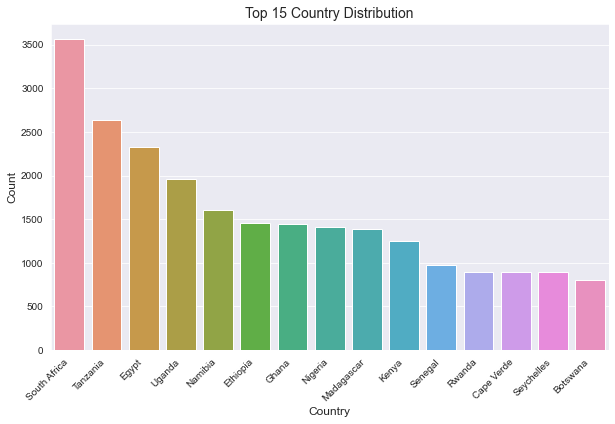

In [ ]:
# Countplot of country distribution
country_counts = df['country'].value_counts().sort_values(ascending=False)
top_10_countries = country_counts.head(15)  # Select top 10 countries

sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))  # Set the figure size
ax = sns.barplot(x=top_10_countries.index, y=top_10_countries.values)

ax.set_xlabel('Country', fontsize=12)  # Set x-axis label and fontsize
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')  # Rotate tick labels
ax.set_ylabel('Count', fontsize=12)  # Set y-axis label and fontsize
ax.set_title('Top 15 Country Distribution', fontsize=14)  # Set plot title

plt.show()

* From the graph above we get to see top 15 leading tourist destinations in Africa. 
* `South Africa` being the leading followed by `Tanzania` and `Egypt.`

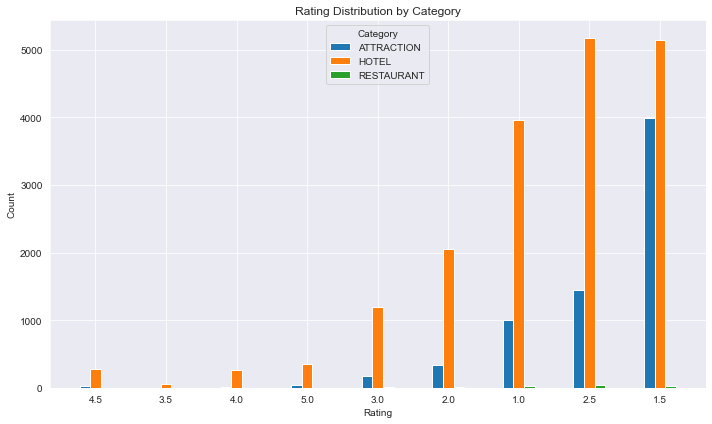

In [ ]:
#visualizing ratings per tourist destination category 
# Group the ratings by category
grouped_data = df.groupby('type')['rating'].value_counts().unstack()
# Get unique categories and ratings
categories = df['type'].unique()
ratings = df['rating'].unique()
# Set the width of each bar
bar_width = 0.15
# Calculate the x position for each group of bars
x = np.arange(len(ratings))
# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))
# Plot the bars for each category within each rating
for i, category in enumerate(categories):
    ax.bar(x + (i * bar_width), grouped_data.loc[category], width=bar_width, label=category)
    # Set the x-axis labels and ticks
    ax.set_xticks(x + ((len(categories) - 1) * bar_width) / 2)
    ax.set_xticklabels(ratings)
    ax.set_xlabel('Rating')
    ax.set_ylabel('Count')
    ax.set_title('Rating Distribution by Category')
    ax.legend(title='Category')
# Adjust the layout
plt.tight_layout()
# Show the plot
plt.show()

* From the chart above it can be seen that `hotel` category was highly rated by customers than other categories. 
* `Restaurant` was poorly rated in all categories.

<function matplotlib.pyplot.show(close=None, block=None)>

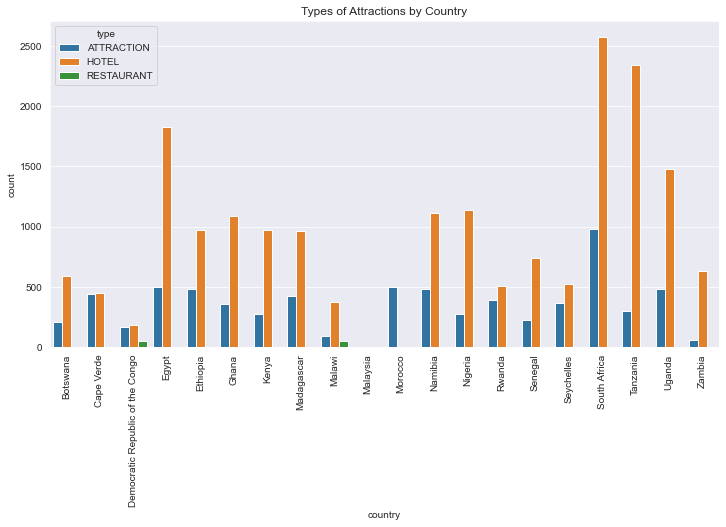

In [ ]:
attractions_count = df.groupby(['country', 'type']).size().reset_index(name='count')

# Plot the count of attractions by country and category
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='count', hue='type', data=attractions_count)
# rotate x-axis labels
plt.xticks(rotation=90)
plt.title('Types of Attractions by Country')
plt.show

* From the graph above we get to see that `hotels` are the leading attractions for tourist in all the countries followed by `attraction.`
* `Restaurant` is the least preffered attraction in all countries.  

### Feature engineering

The columns `numerator` and `denomintor` are features that capture how popular a particular destination is in its `Location`. We can extract some information `regional_rating` by combining `numerator` and `denominator`

> **Some feature engineering** on above mentioned cols

In [ ]:
# New feature we calculate the reciprocal since the Numerator/Denominator would result in lower ranked places
# getting higher values
df['regional_rating'] = (df['Denominator']/df['Numerator']).astype(float)
# Drop num and denom
df.drop(['Numerator', 'Denominator'], axis=1, inplace=True)
df.head()

,id,type,subcategories,name,rating,latitude,longitude,numberOfReviews,amenities,LowerPrice,UpperPrice,RankingType,Location,country,regional_rating
0,1171922,ATTRACTION,[Sights & Landmarks],Khwai River Bridge,4.5,-24.652970,25.898460,45,bathroom,141.0,281.0,things to do,Okavango Delta,Botswana,1.666667
1,2513264,ATTRACTION,[Nature & Parks],Gaborone Game Reserve,3.5,-24.652970,25.898460,115,bathroom,141.0,281.0,things to do,Gaborone,Botswana,3.571429
2,3247057,ATTRACTION,[Sights & Landmarks],ISKCON Gaborone,4.5,-24.652970,25.898460,23,bathroom,141.0,281.0,things to do,Gaborone,Botswana,5.000000
3,478934,ATTRACTION,[Nature & Parks],Serondela Reserve,4.5,-23.427362,26.350575,34,bathroom,141.0,281.0,things to do,Chobe National Park,Botswana,2.666667
4,7931216,ATTRACTION,[Nature & Parks],Khutse Game Reserve,4.0,-22.201755,26.802690,29,bathroom,141.0,281.0,things to do,Gaborone,Botswana,3.125000


#### Visualizing  of top `Locations` per country

  Lets get a better sense of `Location`s per country.

In [ ]:
#list to hold top 5 locations and their counts for each country
top_5_locs_per_country = []
# for loop over top 10 countries
for country in top_10_countries.index:
    country_df = df.loc[df['country']==country].groupby(['Location'])['id'].count().sort_values(ascending=False)[:5]
    curr_top_5_locs = list(country_df.index)
    top_5_value_counts = list(country_df.values)
    top_5_dict = dict(zip(curr_top_5_locs, top_5_value_counts))
    top_5_locs_per_country.append({country: top_5_dict})
    

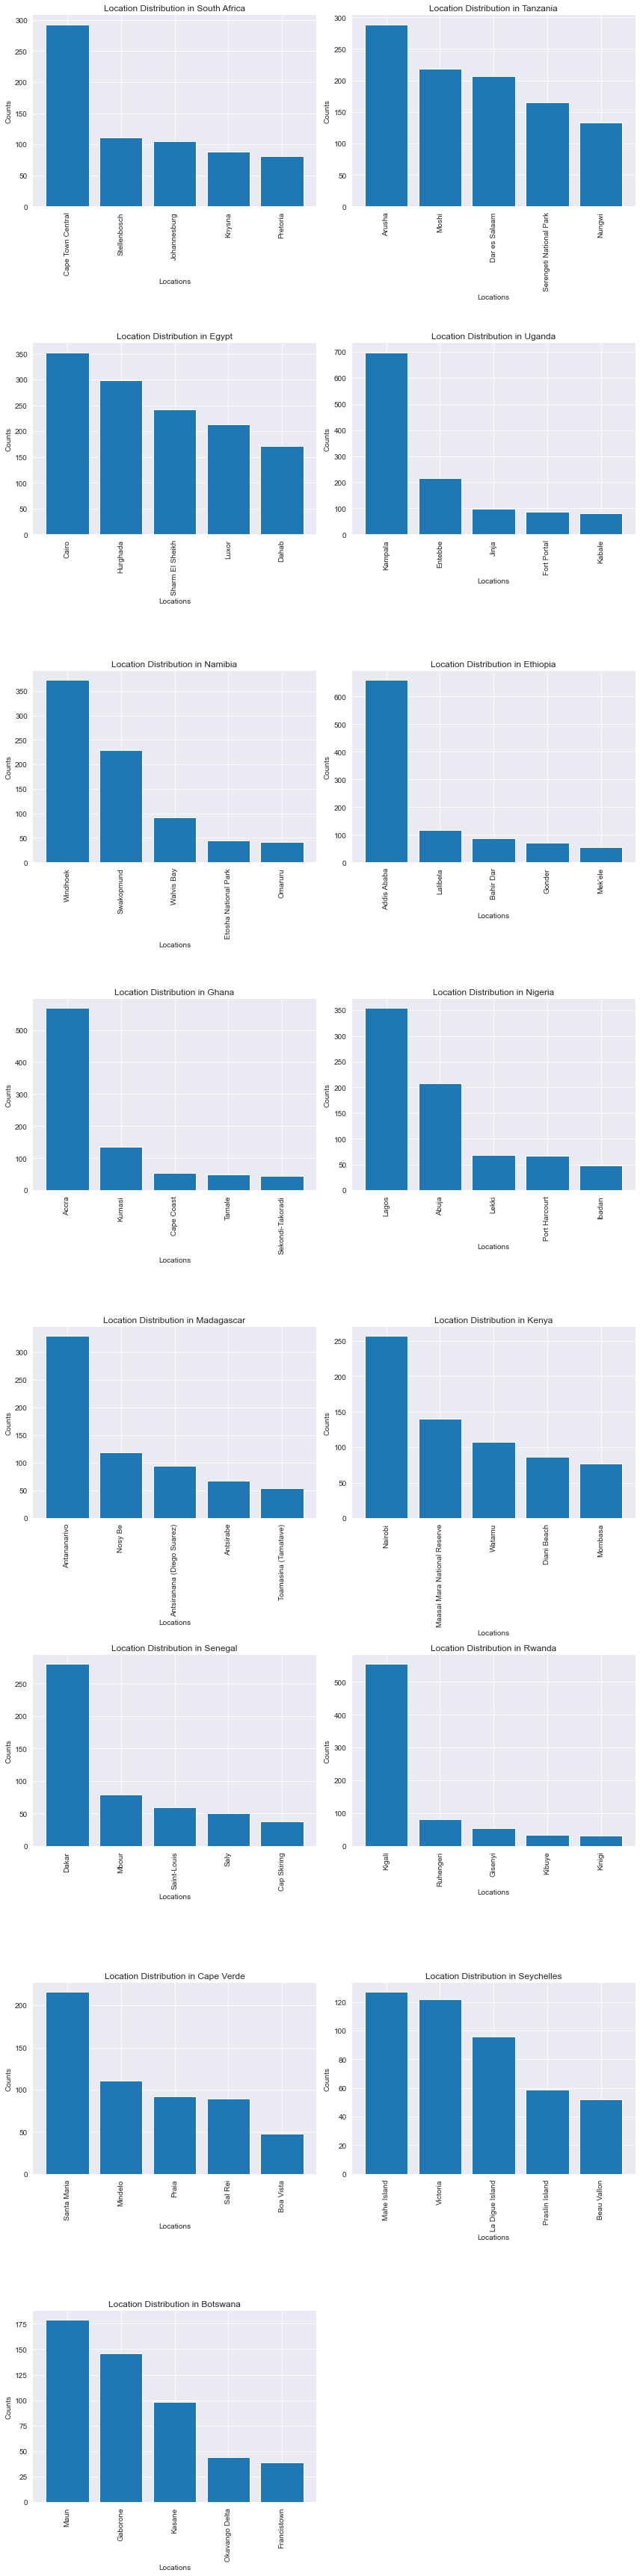

In [ ]:
# Setting dark grid
sns.set_style('darkgrid')

# Calculate the number of rows and columns based on the number of bar plots
num_charts = len(top_5_locs_per_country)
num_rows = math.ceil(num_charts / 2)
num_cols = min(num_charts, 2)

# Create subplots with the specified number of rows and columns
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))
axs = axs.flatten()  # Flatten the axes array for easier indexing

# Loop over the list of dictionaries and create bar plots
for i, d in enumerate(top_5_locs_per_country):
    # Get the country name and locations dictionary
    country, locations = list(d.items())[0]

    # Get the counts and labels for the bar plot
    counts = list(locations.values())
    labels = list(locations.keys())

    # Create the bar plot
    axs[i].bar(labels, counts)
    axs[i].set_title(f'Location Distribution in {country}')
    axs[i].set_xlabel('Locations')
    axs[i].set_ylabel('Counts')
    axs[i].tick_params(axis='x', rotation=90)
    sns.despine(left=True, bottom=True)

# Remove any empty subplots if the number of charts is not a multiple of 2
if num_charts % 2 != 0:
    fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()

The above graph shows top 5 regions to visit in each country

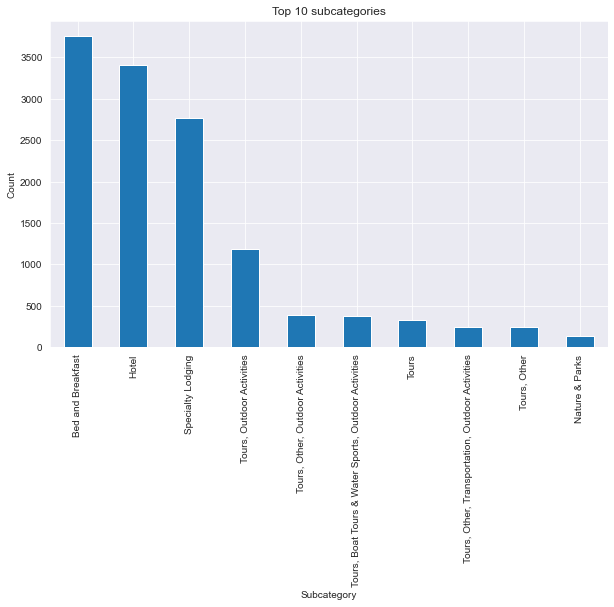

In [ ]:
# Plotting 'Subcategoris' (top 10)
plt.figure(figsize=(10, 6))
top_10_subcategories = clean_df['subcategories'].explode().value_counts().head(10)
top_10_subcategories.plot(kind='bar')
plt.title('Top 10 subcategories')
plt.xlabel('Subcategory')
plt.ylabel('Count')
plt.savefig('Data/images/top_10_subcategories_individually.png')
plt.show()

* The graph above shows the top subcategories for tourist destinations in Africa. 

Columns to plot: Index(['id', 'rating', 'latitude', 'longitude', 'numberOfReviews',
       'LowerPrice', 'UpperPrice', 'Rank', 'Total', 'regional_rating'],
      dtype='object')


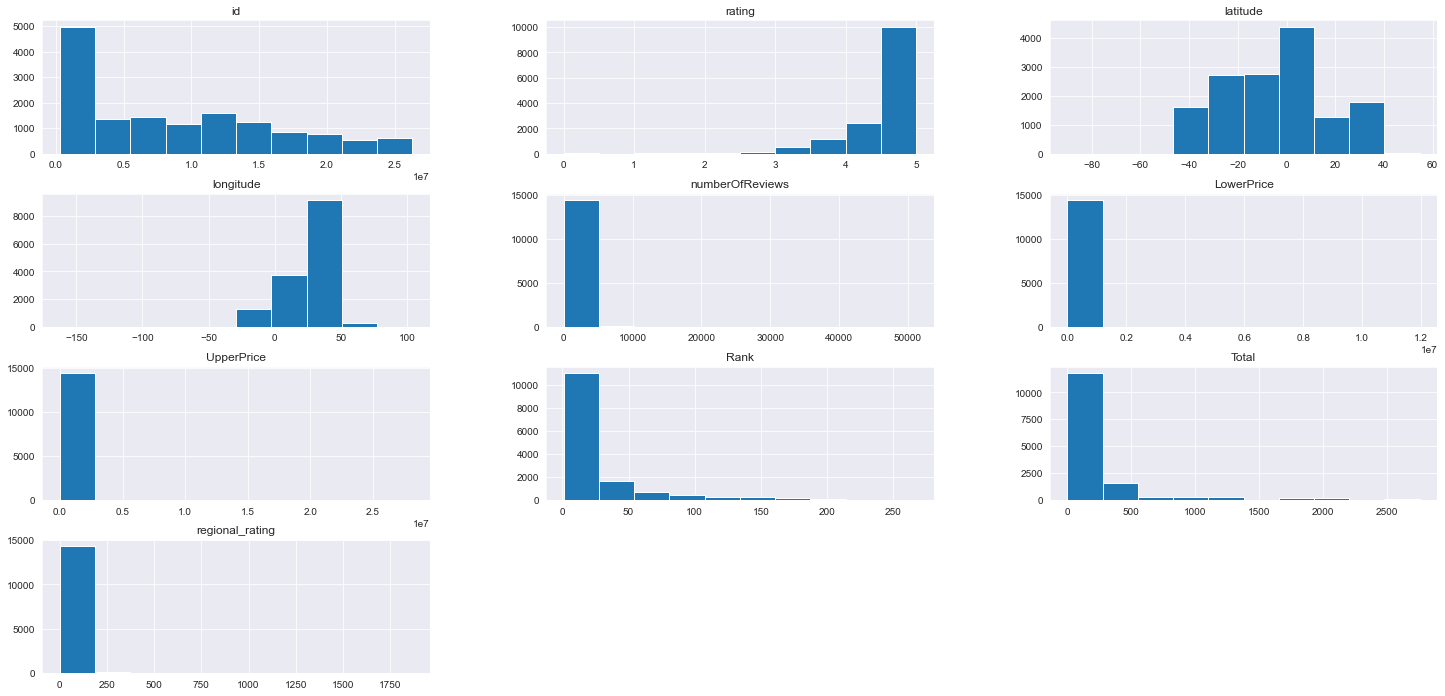

In [ ]:
# Histogram plots for each data
# Select the numerical variables to plot
num_cols_to_plot = clean_df.select_dtypes(include=['int64', 'float64']).columns.drop([])
print("Columns to plot:",num_cols_to_plot )
# Create a histogram for each variable
clean_df[num_cols_to_plot].hist(figsize=(25, 12))
plt.savefig('Data/images/Columnstoplot')
plt.show();

The plots above show distributions for different columns in the dataset 

In [ ]:
# Define the map layout
layout = go.Layout(
    title='Places to visit by Location',
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        style='stamen-terrain',
        bearing=0,
        center=dict(
            lat=clean_df['latitude'].median(),
            lon=clean_df['longitude'].median()
        ),
        pitch=0,
        zoom=10
    ),
)

# Define the map data as a scatter plot of the coordinates
data = go.Scattermapbox(
    lat=clean_df['latitude'],
    lon=clean_df['longitude'],
    mode='markers',
    marker=dict(
        size=5,
        color=clean_df['rating'],
        opacity=0.8
    ),
    text=['Price: ${}'.format(i) for i in clean_df['UpperPrice']],
    hovertext = clean_df.apply(lambda x: f"Ranking Type: ${x['RankingType']}, Location: {x['locationString']}", axis=1),
)

# Create the map figure and show it
fig = go.Figure(data=[data], layout=layout)
plt.savefig('Data/images/map')
fig.show();

<Figure size 432x288 with 0 Axes>

* The above map shows different locations to visit in Africa 

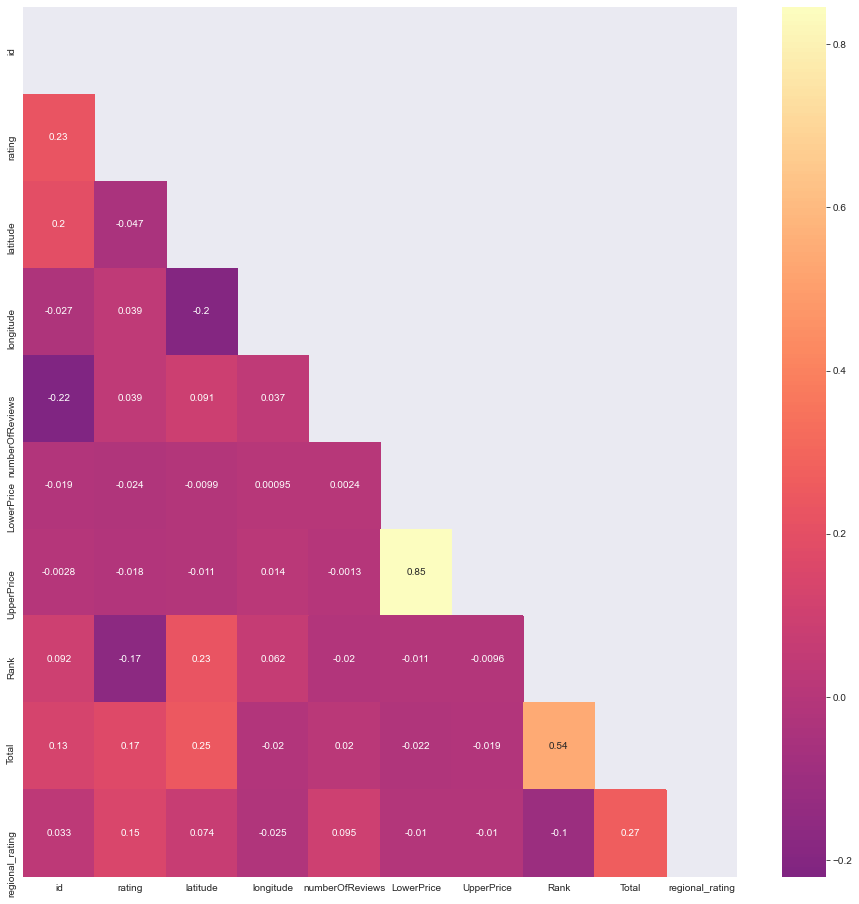

<Figure size 432x288 with 0 Axes>

In [ ]:
## Multicollinearity

# Create a correlation matrix
corr_matrix = clean_df.corr()
# Create a fig size
plt.figure(figsize=(16, 16))
# Create a mask to show only the lower triangle
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Plot the heatmap with the lower triangle mask applied
sns.heatmap(corr_matrix, mask=mask, cmap='magma', center=0, annot=True)
# Show the plot
plt.show();
# Save figure
plt.savefig('Data/images/multicollinearity.png')

From the above plot, there appears to be very little correlation between features apart from upper and lower price 

## Modelling

Modelling was done on a separate notebook 'modelling.ipynb' using the clean dataframe stored as `clean_data.csv`